# Investigation of Loan Data from Prosper
## by Adolf Nefischer

## Investigation Overview

> What factors affect a loan’s outcome status?

## Dataset Overview

> This project investigates the Loan Data from Prosper and shows the relationship within the data. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
dfn =df.copy()

# merge Loan Status
dfn.loc[dfn['LoanStatus'].str.contains('Past Due'),'LoanStatus'] = 'PastDueOrDefaulted'
dfn.loc[dfn['LoanStatus'].str.contains('Defaulted'),'LoanStatus'] = 'PastDueOrDefaulted'
dfn.loc[dfn['LoanStatus'].str.contains('FinalPaymentInProgress'),'LoanStatus'] = 'Completed'
dfn = dfn.drop(dfn[dfn['LoanStatus'].str.contains('Cancelled')].index)
dfs =dfn.copy()
dfs.loc[dfs['LoanStatus'].str.contains('PastDueOrDefaulted'),'LoanStatus'] = 'Failed'
dfs.loc[dfs['LoanStatus'].str.contains('Chargedoff'),'LoanStatus'] = 'Failed'
dfs = dfs.drop(dfs[dfs['LoanStatus'].str.contains('Current')].index)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loan Status

> Bevore we start any work the actual Loan Status is investigated and cleaned up, i.e. verious categories of "Past due xx days" and even Chargedoff loans are merged together. As we are interessted in the outcome we only look at Completed and failed loans.

Loan Status:
Completed: 66.74%
Failed: 33.26%


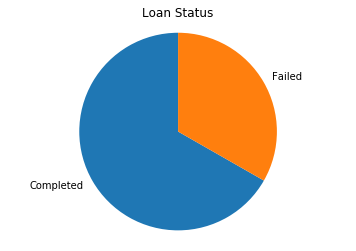

In [3]:
loanstatus = dfs['LoanStatus'].value_counts()
label = 'Completed', 'Failed'
plt.pie(loanstatus, labels=label, startangle=90)
plt.axis('equal')
plt.title('Loan Status');

print('Loan Status:')
print('Completed:',"{:.2%}".format(loanstatus[0]/sum(loanstatus)))
print('Failed:',"{:.2%}".format(loanstatus[1]/sum(loanstatus)))

## Loan Status and Debt To Income Ratio

> We now have a close look of how the cleaned up loan status correlates to the Debt To Income Ratio. Failed loans seem to have a higher Dept To Income Ratio.

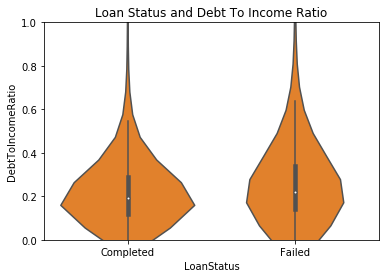

In [4]:
ax = sb.violinplot(data = dfs, x = 'LoanStatus', y = 'DebtToIncomeRatio', 
                    color = sb.color_palette()[1]);
ax.set_ylim(0, 1);
plt.title('Loan Status and Debt To Income Ratio');

## Loan Status across Income Range and Debt To Income Ratio

> To better understand this correlation we add the Income Range to our investigation. It becomes clear that loan takers with lower income tend to have a higher Dept to Income Ratio. Failed loans are caused by an especially high Dept To Income Ratio.

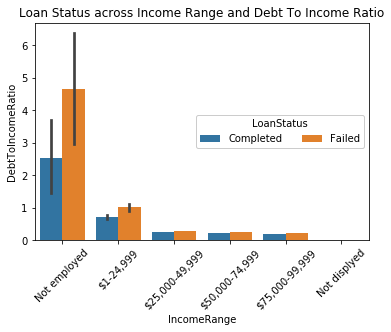

In [5]:
income_order = ["Not employed", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "Not displyed"]
ax = sb.barplot(data = dfs, x = 'IncomeRange', y = 'DebtToIncomeRatio', hue = 'LoanStatus', order = income_order)
ax.legend(loc = 7, ncol = 3, framealpha = 1, title = 'LoanStatus')
plt.title('Loan Status across Income Range and Debt To Income Ratio');
plt.xticks(rotation = 45);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!